<h1 algin='center'> Univariate Impute: Numarical </h1>

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- When data is __normally distributed__ we use mean to impute missing value. (but for normally distribution mean, median, mode may give same result) 
- For Skewed data we mostly use median to impute missing value.


#### Benefite of mean/median imputation 

- Simple to implement

#### disadvantage


- Change in distribution of data
- Outlier(the number which are not oulier started to apear as outlier)
- relationship of the column with other column will change (may increase problem of covariance or correlation)


#### When to use Mean/meadian Impute

- When data is missing completly at random(MCAR)
- missing data is <5 %


In [4]:
df = pd.read_csv('titanic_toy.csv')

In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [8]:
X= df.drop(columns='Survived')

In [9]:
y=df['Survived']

### Train test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=2)

In [14]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [15]:
X_train.isnull().sum()

Age       148
Fare       36
Family      0
dtype: int64

In [17]:
## Find Mean
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare =X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

### Using pandas

In [ ]:
X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Age_mean']=X_train['Age'].fillna(mean_age)

X_train['Fare_median']=X_train['Fare'].fillna(median_fare)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_fare)

In [20]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
704,26.0,7.8542,1,26.00,26.000000,7.8542,7.8542
498,25.0,151.5500,3,25.00,25.000000,151.5500,151.5500
685,25.0,41.5792,3,25.00,25.000000,41.5792,41.5792
168,NaN,25.9250,0,28.75,29.785904,25.9250,25.9250
686,14.0,39.6875,5,14.00,14.000000,39.6875,39.6875


- For this imputation we must check change in variance
- As it give how nuch data is deviated from mean
- When we do mean/median imputaion our variance will shrink
- But this shrink in variance should not be drastic

In [21]:
print('Original Age Variance', X_train['Age'].var())
print('Age Variance after Mean imputation', X_train['Age_mean'].var())
print('Age Variance after Median imputation', X_train['Age_median'].var())

print('Original Fare Variance', X_train['Fare'].var())
print('Age Variance after Mean imputation', X_train['Fare_mean'].var())
print('Age Variance after Median imputation', X_train['Fare_median'].var())


Original Age Variance 204.3495133904614
Age Variance after Mean imputation 161.81262452718673
Age Variance after Median imputation 161.9895663346054
Original Fare Variance 2448.197913706318
Age Variance after Mean imputation 2324.2385256705547
Age Variance after Median imputation 2340.0910219753637


### Change in distribution

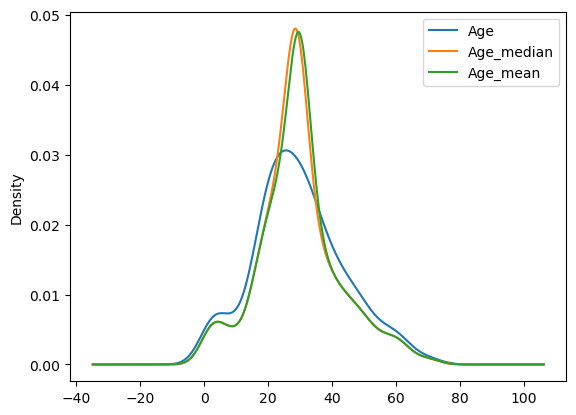

In [22]:
fig = plt.figure()
ax= fig.add_subplot(111)

# Original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

#Variable imputed with median
X_train['Age_median'].plot(kind='kde',ax=ax)


#Variable imputed with mean
X_train['Age_mean'].plot(kind='kde',ax=ax)

# add ledends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')




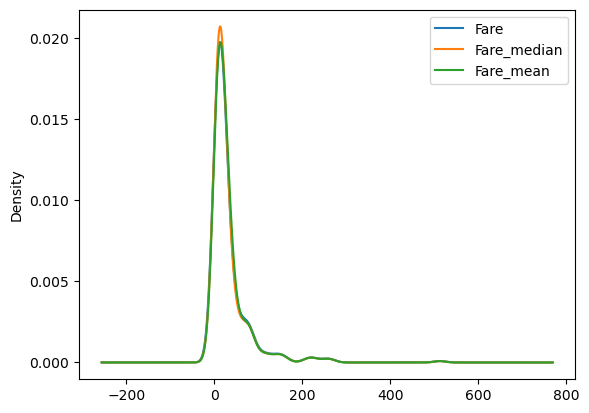

In [23]:
fig = plt.figure()
ax= fig.add_subplot(111)

# Original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

#Variable imputed with median
X_train['Fare_median'].plot(kind='kde',ax=ax)


#Variable imputed with mean
X_train['Fare_mean'].plot(kind='kde',ax=ax)

# add ledends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

In [24]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [25]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<AxesSubplot:>

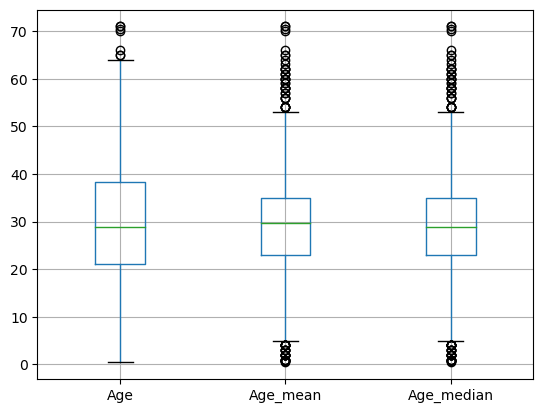

In [26]:
### Box plot
X_train[['Age','Age_mean', 'Age_median']].boxplot()

<AxesSubplot:>

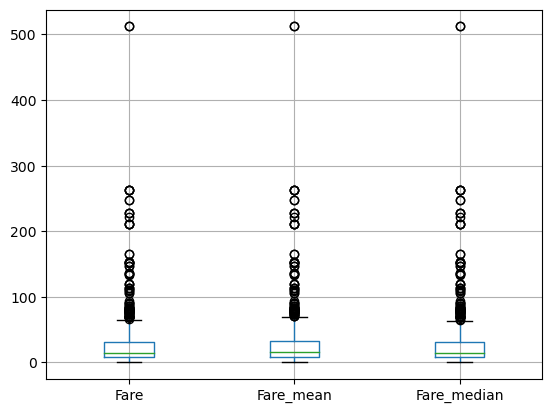

In [27]:
X_train[['Fare','Fare_mean', 'Fare_median']].boxplot()

### Using Sklearn

#### Train test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=2)

### Simple Imputer

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

### Column transformer

In [31]:
from sklearn.compose import ColumnTransformer

In [32]:
trf = ColumnTransformer(
[
    ('impute1',imputer1,['Age']),
    ('impute2',imputer2,['Fare'])
], remainder='passthrough')

In [33]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('impute2', SimpleImputer(), ['Fare'])])

In [34]:
trf.named_transformers_['impute1'].statistics_

array([28.75])

In [35]:
trf.named_transformers_['impute2'].statistics_

array([32.61759689])

In [36]:
X_train_transformed = trf.transform(X_train)
X_test_transformed = trf.transform(X_test)

In [37]:
X_train_transformed

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

### Arbitary Value imputation

- Use random value to impute
- Use when you feel data is not missing at random
- It not use frquently

#### Benefites of Arbitary Imputation 

- Easy to apply

#### Disadvantage

- Outlier
- Chaneg in distribution
- Change in Covariance

In [38]:
df1 = df.copy()

In [39]:
df1.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


### Using pandas 

In [40]:
X= df1.drop(columns='Survived')
y=df1['Survived']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=2)

In [42]:
X_train['Age_99']= X_train['Age'].fillna(99)
X_train['Age_misus1']= X_train['Age'].fillna(-1)

X_train['Fare_99'] = X_train['Fare'].fillna(99)
X_train['Fare_misus1'] = X_train['Fare'].fillna(-1)

In [43]:
print('Original Age Variance', X_train['Age'].var())
print('Age Variance after Mean imputation', X_train['Age_99'].var())
print('Age Variance after Median imputation', X_train['Age_misus1'].var())

print('Original Fare Variance', X_train['Fare'].var())
print('Age Variance after Mean imputation', X_train['Fare_99'].var())
print('Age Variance after Median imputation', X_train['Fare_misus1'].var())


Original Age Variance 204.3495133904614
Age Variance after Mean imputation 951.7275570187172
Age Variance after Median imputation 318.0896202624484
Original Fare Variance 2448.197913706318
Age Variance after Mean imputation 2536.0773428319685
Age Variance after Median imputation 2378.5676784883503


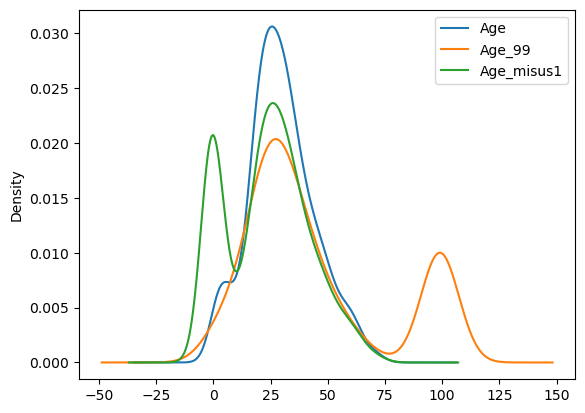

In [44]:
fig = plt.figure()
ax= fig.add_subplot(111)

# Original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

#Variable imputed with median
X_train['Age_99'].plot(kind='kde',ax=ax)


#Variable imputed with mean
X_train['Age_misus1'].plot(kind='kde',ax=ax)

# add ledends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')




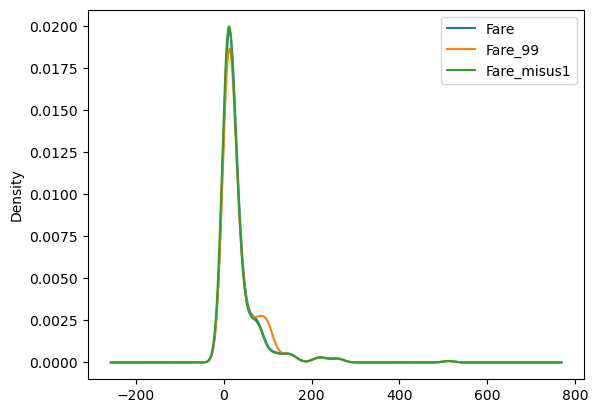

In [45]:
fig = plt.figure()
ax= fig.add_subplot(111)

# Original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

#Variable imputed with median
X_train['Fare_99'].plot(kind='kde',ax=ax)


#Variable imputed with mean
X_train['Fare_misus1'].plot(kind='kde',ax=ax)

# add ledends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

<AxesSubplot:>

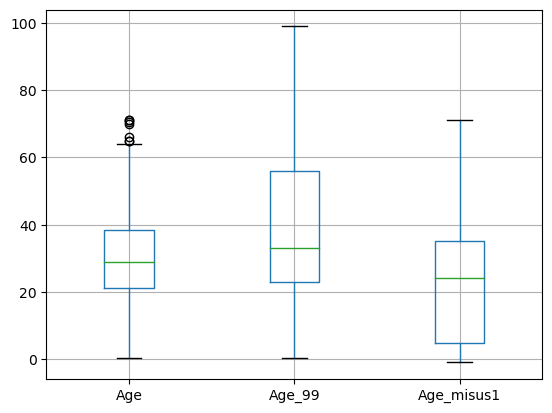

In [49]:
X_train[['Age', 'Age_99','Age_misus1']].boxplot()

In [50]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_misus1,Fare_99,Fare_misus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,73.268412,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.051452,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.878826,-94.317400
Age_misus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141
Fare_99,73.268412,2448.197914,16.051452,-100.878826,128.692715,2536.077343,2216.958409
Fare_misus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678


In [51]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_misus1,Fare_99,Fare_misus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.095527,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.192723,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.064933,-0.062687
Age_misus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.143284,0.131514
Fare_99,0.095527,1.000000,0.192723,-0.064933,0.143284,1.000000,0.902648
Fare_misus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.902648,1.000000


### Using Sklearn

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=2)

In [53]:
imputer1  = SimpleImputer(strategy='constant',fill_value=99)
imputer2  = SimpleImputer(strategy='constant',fill_value=999)


In [54]:
trf = ColumnTransformer(
[
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [56]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [58]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [59]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [62]:
X_train_trf = trf.transform(X_train)
X_test_trf = trf.transform(X_test)

In [64]:
X_train_trf

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])